# Разведочный анализ данных (exploratory data analysis, EDA)

**Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.**

Cделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, необходимо провести разведывательный анализ данных и составьте отчёт по его результатам. 

Датасет содержит переменные:

-  1 school — аббревиатура школы, в которой учится ученик
-  2 sex — пол ученика ('F' - женский, 'M' - мужской)
-  3 age — возраст ученика (от 15 до 22) 
-  4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
-  5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
-  6 pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
-  7 medu — образование матери (0 - нет, 1 - 4 кл, 2 - 5-9 кл, 3 - среднее спец или 11 кл, 4 - высшее)
-  8 Fedu — образование отца (0 - нет, 1 - 4 кл, 2 - 5-9 кл, 3 - среднее спец или 11 кл, 4 - высшее)
-  9 mjob — работа матери ('teacher'-учитель, 'health'-сфера здр-я, 'services'-госслужба, 'at_home'-не работает, 'other' - другое)
- 10 fjob — работа отца ('teacher'-учитель, 'health'-сфера здр-я, 'services'-госслужба, 'at_home'-не работает, 'other' - другое)
- 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
- 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
- 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
- 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
- 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
- 16 schoolsup — дополнительная образовательная поддержка (yes или no)
- 17 famsup — семейная образовательная поддержка (yes или no)
- 18 paid — дополнительные платные занятия по математике (yes или no)
- 19 activities — дополнительные внеучебные занятия (yes или no)
- 20 nursery — посещал детский сад (yes или no)
- 21 higher — хочет получить высшее образование (yes или no)
- 22 internet — наличие интернета дома (yes или no)
- 23 romantic — в романтических отношениях (yes или no)
- 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
- 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень много)
- 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
- 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
- 28 absences — количество пропущенных занятий
- 29 score — баллы по госэкзамену по математике
- 30 studytime_gr нет описания

# 1. Первичная обработка данных.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import math
%matplotlib inline

# Задаем некоторые опции библиотеки pandas, которые
# настраивают вывод
#pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 80)

In [3]:
# записываем CSV-файл в объект DataFrame
stud = pd.read_csv('stud_math.csv', encoding='cp1251', sep=',')

In [4]:
# смотрим форму датафрейма
stud.shape

(395, 30)

In [5]:
# проверяем, успешно ли импортируются данные
display(stud.head(5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [5]:
# проверим все ли столбцы, что есть в описании загрузились
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

**Вывод:**
- загрузилось 30 столбцов, а в описании 29 
- всего 395 записей

# 2. Первичный анализ данных в столбцах 

In [6]:
# посмотрим как записаны столбцы
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [7]:
# переименуем столбцы начинающиеся с большой буквы на маленькую для удобства
stud.rename(columns={'Pstatus': 'pstatus', 'Medu': 'medu', 'Fedu': 'fedu',
                     'Mjob': 'mjob', 'Fjob': 'fjob', 'studytime, granular': 'studytime_gr'}, inplace=True)

In [8]:
# проверяем соответствие, все верно
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        395 non-null    object 
 1   sex           395 non-null    object 
 2   age           395 non-null    int64  
 3   address       378 non-null    object 
 4   famsize       368 non-null    object 
 5   pstatus       350 non-null    object 
 6   medu          392 non-null    float64
 7   fedu          371 non-null    float64
 8   mjob          376 non-null    object 
 9   fjob          359 non-null    object 
 10  reason        378 non-null    object 
 11  guardian      364 non-null    object 
 12  traveltime    367 non-null    float64
 13  studytime     388 non-null    float64
 14  failures      373 non-null    float64
 15  schoolsup     386 non-null    object 
 16  famsup        356 non-null    object 
 17  paid          355 non-null    object 
 18  activities    381 non-null    

## Дубли и пропуски в данных

In [9]:
# если есть дублирующие строки,то удаляем, оставив последнее из дублирующихся наблюдений
stud.drop_duplicates(keep='last')
# удаляем те строки, в которых все значения являются значениями NaN
stud.dropna(how='all')
# попрощаемся со столбцами,  в которых все значения являются значениями NaN
stud.dropna(how='all', axis=1)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_gr,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [10]:
# смотрим форму датафрейма
stud.shape

(395, 30)

Количество строк и столбцов не изменилось. 
Дублирующих строк нет. Колонок и строк полностью из пропусков нет

In [11]:
# выводим информацию о количестве пропусков
stud.isnull().sum()

school           0
sex              0
age              0
address         17
famsize         27
pstatus         45
medu             3
fedu            24
mjob            19
fjob            36
reason          17
guardian        31
traveltime      28
studytime        7
failures        22
schoolsup        9
famsup          39
paid            40
activities      14
nursery         16
studytime_gr     7
higher          20
internet        34
romantic        31
famrel          27
freetime        11
goout            8
health          15
absences        12
score            6
dtype: int64

В 3 колонках (school, sex, age) нет пропусков. В остальных есть от 3 до 45. 

In [12]:
# Посмотрим количество пропусков в процентах, так нагляднее
stud_null = round(stud.isnull().sum() / len(stud)*100, 2)
print(stud_null)

school           0.00
sex              0.00
age              0.00
address          4.30
famsize          6.84
pstatus         11.39
medu             0.76
fedu             6.08
mjob             4.81
fjob             9.11
reason           4.30
guardian         7.85
traveltime       7.09
studytime        1.77
failures         5.57
schoolsup        2.28
famsup           9.87
paid            10.13
activities       3.54
nursery          4.05
studytime_gr     1.77
higher           5.06
internet         8.61
romantic         7.85
famrel           6.84
freetime         2.78
goout            2.03
health           3.80
absences         3.04
score            1.52
dtype: float64


Колонка pstatus  (статус совместного жилья родителей) имеет максимальное количество незаполненных значений 11,39%. 

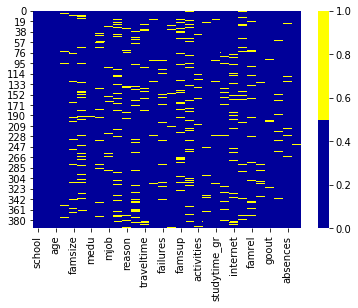

In [13]:
# Посмотрим с помощью тепловой карты на пропущенные значения
cols = stud.columns
# определяем цвета
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(stud[cols].isnull(), cmap=sns.color_palette(colours))

In [14]:
len(stud.dropna(axis=0, how='any'))

97

Отбросить записи, содержащие пропущенные значения, нельзя. Только 97 строк не содержат пропусков (24,56%). 

Можно воспользоваться методом принудительного заполнения пропусков. 
Для числовых признаков на место пропуска можно записать среднее или медианное значение, полученное из остальных записей. 
Для категориальных признаков можно использовать в качестве заполнителя наиболее часто встречающееся значение. Но для получения максимально качественно подготовленного набора данных, мы будем вдумчиво рассматривать каждый признак по отдельности, поэтому код выполнять пока не будем.

## Смотрим статистики

In [15]:
# Для каждой колонки с типом object (строчные данные)
# выводим количество непустых строк, уникальных значений,
# самое частое значение (top) и частоту этого значения (freq),
# создается список категориальных переменных
categorical_columns = [c for c in stud.loc[:,
                                           stud.columns] if stud[c].dtype.name == 'object']
stud[categorical_columns].describe()

,school,sex,address,famsize,pstatus,mjob,fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [16]:
# выводим частоты категорий по каждой
# категориальной переменной
categorical_columns = [
    c for c in stud.columns if stud[c].dtype.name == 'object']
for c in categorical_columns:
    print(stud[c].value_counts())

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
U    295
R     83
Name: address, dtype: int64
GT3    261
LE3    107
Name: famsize, dtype: int64
T    314
A     36
Name: pstatus, dtype: int64
other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64
other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64
mother    250
father     86
other      28
Name: guardian, dtype: int64
no     335
yes     51
Name: schoolsup, dtype: int64
yes    219
no     137
Name: famsup, dtype: int64
no     200
yes    155
Name: paid, dtype: int64
yes    195
no     186
Name: activities, dtype: int64
yes    300
no      79
Name: nursery, dtype: int64
yes    356
no      19
Name: higher, dtype: int64
yes    305
no      56
Name: internet, dtype: int64
no     240
yes    124
Name: romantic, 

In [17]:
# смотрим уникальные значения категориальных переменных
# сравниваем с описанием
for c in categorical_columns:
    print(stud[c].unique())

['GP' 'MS']
['F' 'M']
['U' nan 'R']
[nan 'GT3' 'LE3']
['A' nan 'T']
['at_home' 'health' 'other' 'services' 'teacher' nan]
['teacher' 'other' nan 'health' 'services' 'at_home']
['course' 'other' 'home' 'reputation' nan]
['mother' 'father' 'other' nan]
['yes' 'no' nan]
['no' 'yes' nan]
['no' nan 'yes']
['no' 'yes' nan]
['yes' 'no' nan]
['yes' nan 'no']
[nan 'yes' 'no']
['no' nan 'yes']


In [18]:
# Признаки с числовым типом
stud._get_numeric_data()

,age,medu,fedu,traveltime,studytime,failures,studytime_gr,famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,-6.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,-6.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,-9.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,-6.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2.0,2.0,1.0,2.0,2.0,-6.0,5.0,5.0,4.0,4.0,212.0,45.0
391,17,3.0,1.0,2.0,1.0,0.0,-3.0,2.0,4.0,5.0,2.0,3.0,80.0
392,21,1.0,1.0,1.0,1.0,3.0,-3.0,5.0,5.0,3.0,3.0,3.0,35.0
393,18,3.0,2.0,3.0,1.0,0.0,-3.0,4.0,4.0,1.0,5.0,0.0,50.0


In [19]:
# смотрим статистики для количественных переменных
# для каждой колонки выводится количество среднее, стандартное
# отклонение, минимум, максимум, процентиль
stud.describe()

,age,medu,fedu,traveltime,studytime,failures,studytime_gr,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [20]:
# выводим частоты категорий по каждой
# переменной c числовым типом
num_columns = [
    c for c in stud.columns if stud[c].dtype.name != 'object']
for c in num_columns:
    print(stud[c].value_counts())

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64
2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64
0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64
-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_gr, dtype: int64
 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64
3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64
5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64
0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
1

In [22]:
# смотрим уникальные значения числовых переменных
# сравниваем с описанием
for c in num_columns:
    print(stud[c].unique())

[18 17 15 16 19 22 20 21]
[ 4.  1.  3.  2. nan  0.]
[ 4.  1.  2.  3. 40. nan  0.]
[ 2.  1.  3. nan  4.]
[ 2.  3.  1. nan  4.]
[ 0.  3. nan  2.  1.]
[ -6.  -9.  -3.  nan -12.]
[ 4.  5.  3. nan -1.  2.  1.]
[ 3.  2.  4.  1.  5. nan]
[ 4.  3.  2.  1.  5. nan]
[ 3.  5.  1.  2.  4. nan]
[  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]
[ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  nan  20.]


Теперь рассмотрим все признаки по отдельности

## Категориальные переменные

**Начнем с категориальных переменных содержащих несколько признаков**

### school — аббревиатура школы, в которой учится ученик 

In [23]:
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


**school:** в наборе данных встречается 2 названия школ: GP - 349 (88,35%), MS - 46 (11,65%). Пропусков нет. 

### medu — образование матери (0 - нет, 1 - 4 кл, 2 - 5-9 кл, 3 - среднее спец или 11 кл, 4 - высшее)

In [24]:
pd.DataFrame(stud.medu.value_counts())

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


In [25]:
# посмотрим на строки с пропусками значения medu
medu_null = stud[stud.medu.isnull()]
medu_null

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_gr,higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,NaN,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,U,GT3,NaN,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,-6.0,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


 Все они посещали детский сад (nursery),  не занимались на дополнительных платных занятиях по математике (paid),
 ходили в школу "GP", время в пути до школы < 15. 
 По этим признакам нельзя определить образование матери.
 Но в одной из строк работа матери "госслужба". В нашей стране госслужащие имеют высшее образование.
 Рискну предположить, что образование матери высшее (4).

In [26]:
stud[stud.mjob == 'services'].medu.value_counts()

3.0    38
2.0    30
4.0    24
1.0     5
Name: medu, dtype: int64

Предположение оказалось не верным.

In [27]:
# меняем тип переменной на 'object'
stud['medu'] = stud['medu'].astype('str')

count     395
unique      6
top       4.0
freq      131
Name: medu, dtype: object

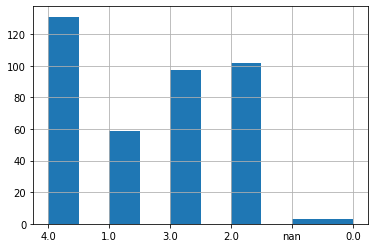

In [28]:
stud.medu.hist()
stud.medu.describe()

**Medu:** пять уникальных значений как в описании. Пропуски в 3 строках (0,76%). 

### Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [29]:
pd.DataFrame(stud.fedu.value_counts())

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


In [30]:
# Есть одно значение отсутствующее в описании датасета,
# оно по написанию очень похоже на 4.0,
# вероятно это ошибка ("человеческий фактор") при внесении информации
# поэтому заменим его на 4.0
stud.loc[stud['fedu'] == 40.0, 'fedu'] = 4.0

In [31]:
# проверяем
pd.DataFrame(stud.fedu.value_counts())

,fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


In [32]:
# посмотрим на строки с пропусками значения fedu
fedu_null = stud[stud.fedu.isnull()]
fedu_null

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_gr,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,-9.0,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0


Еще раз попытаюсь по профессии определить образование.

In [33]:
# если учитель мужчина, то скорее всего имеет высшее образование
stud[stud.fjob == 'teacher'].fedu.value_counts()

4.0    25
3.0     1
Name: fedu, dtype: int64

In [34]:
# госслужащий мужчина, образование разное
stud[stud.fjob == 'services'].fedu.value_counts()

3.0    31
2.0    27
1.0    19
4.0    17
Name: fedu, dtype: int64

In [35]:
# меняем пропуски в образовании отцов, работающих учителями на высшее 
stud.loc[(stud['fedu'].isnull()) & (stud['fjob'] == 'teacher'), 'fedu'] = 4.0

In [36]:
# проверяем
stud[stud.fjob == 'teacher'].fedu.value_counts()

4.0    28
3.0     1
Name: fedu, dtype: int64

count    374.000000
mean       2.529412
std        1.092475
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

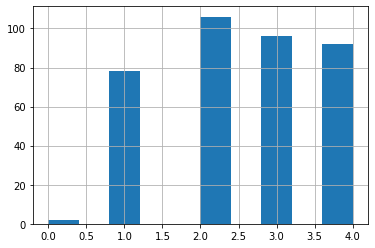

In [37]:
stud.fedu.hist()
stud.fedu.describe()

In [38]:
# меняем тип переменной на 'object'
stud['fedu'] = stud['fedu'].astype('str')

**Fedu:** пять уникальных значений как в описании. Одно значение "40.0", отсутствующее в описании датасета заменено
на "4.0". Пропущеных значений 24 (6,08%), заполнены 3 строки значением "4" - высшее образование в записях с работой отца "учитель". 
Заполнить остальные 21 пропусков на данный момент не представляется возможным, так как вариантов для заполнения слишком много,  выделить какое-то одно значение из пяти однозначно доминирующее невозможно.

 ### mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [39]:
pd.DataFrame(stud.mjob.value_counts())

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


count       376
unique        5
top       other
freq        133
Name: mjob, dtype: object

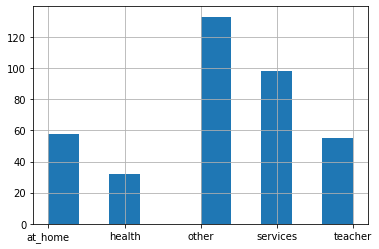

In [42]:
stud.mjob.hist()
stud.mjob.describe()

**mjob:** пять уникальных значений как в описании. Чаще всех встречается "other". Пропущеных значений 19 (4,81%). Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения много, выделить какое-то одно значение из пяти однозначно доминирующее невозможно.

###  fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [43]:
pd.DataFrame(stud.fjob.value_counts())

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


count       359
unique        5
top       other
freq        197
Name: fjob, dtype: object

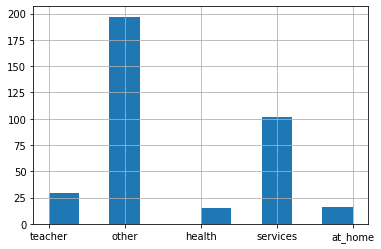

In [44]:
stud.fjob.hist()
stud.fjob.describe()

**Fjob:** пять уникальных значений как в описании. 36 строк в которых значения неизвестны (9.11%). Два значимых значения - services и other, но все равно вариантов для заполнения слишком много (два из пяти), однозначно доминирующего нет.

### reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [45]:
pd.DataFrame(stud.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

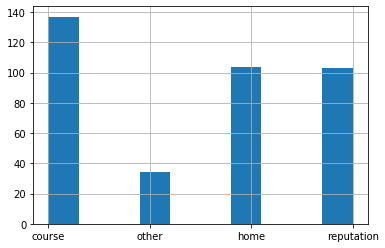

In [46]:
stud.reason.hist()
stud.reason.describe()

**reason:** четыре уникальных значения как в описании. 16 строк в которых значения неизвестны (4,3%). Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения много, выделить какое-то одно значение из четырех однозначно доминирующее невозможно.

### guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [47]:
pd.DataFrame(stud.guardian.value_counts())

,guardian
mother,250
father,86
other,28


count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

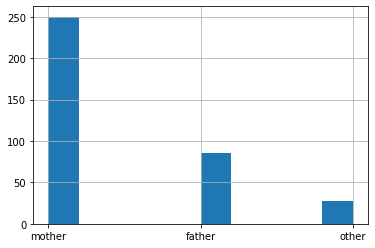

In [48]:
stud.guardian.hist()
stud.guardian.describe()

**guardian:** три уникальных значения как в описании. Значения в 31 строке неизвестны (7,85%). Можно заполнить значением mother. но вариантов для заполнения слишком много (два из трех), однозначно доминирующего нет.

### studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов) и studytime_gr, которого нет в описании

In [49]:
# посмотрим визуально на несколько значений
stud.loc[:, ['studytime', 'studytime_gr']]

,studytime,studytime_gr
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


Очень похоже, что значения studytime_gr равны значениям признака studytime умноженному на -3

In [50]:
# проверяем корреляцию двух столбцов
stud['studytime'].corr(stud['studytime_gr'])

-1.0

In [51]:
# удаляем столбец studytime_gr для дальнейшего анализа он не пригодится
stud.drop(['studytime_gr'], inplace=True, axis=1)

In [52]:
pd.DataFrame(stud.studytime.value_counts())

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


In [53]:
# меняем тип переменной на 'object'
stud['studytime'] = stud['studytime'].astype('str')

**studytime:** четыре уникальных значения как в описании. В 7 строках (1,77%), время на учебу помимо школы неизвестно. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения много, выделить какое-то одно значение из четырех однозначно доминирующее невозможно.

**studytime, granular** удален, так как он на 100% обратно скоррелирован с признаком studytime.

### traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [54]:
pd.DataFrame(stud.traveltime.value_counts())

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Посмотрим на среднее время ученика в пути до школы, в зависимости от адреса ученика и школы:

In [55]:
stud.groupby(['address', 'school']).traveltime.mean()

address  school
R        GP        1.672727
         MS        2.190476
U        GP        1.319231
         MS        1.529412
Name: traveltime, dtype: float64

Исходя из средних значений, ставим 1, если у ученика городской адрес и 2 если он проживает за городом.

In [56]:
stud['traveltime'] = stud.apply(lambda x: (2 if x.address == 'R' else 1)
                                if pd.isna(x.traveltime) else x.traveltime, axis=1)

count    395.000000
mean       1.425316
std        0.680674
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

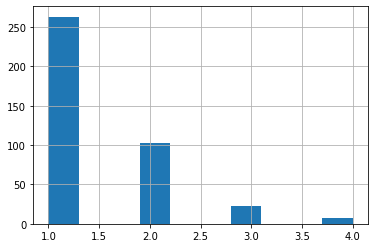

In [57]:
stud.traveltime.hist()
stud.traveltime.describe()

**traveltime:** четыре уникальных значения как в описании. 28 строк (7,09%) в которых значения неизвестны заполнены исходя из средних значений по адресу. 

###  failures — количество внеучебных неудач  (n, если 1<=n<=3, иначе 0)

In [58]:
pd.DataFrame(stud.failures.value_counts())

,failures
0.0,293
1.0,49
2.0,16
3.0,15


In [59]:
# меняем тип переменной на 'object'
stud['failures'] = stud['failures'].astype('str')

count     395
unique      5
top       0.0
freq      293
Name: failures, dtype: object

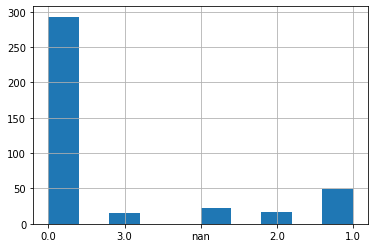

In [60]:
stud.failures.hist()
stud.failures.describe()

**failures:** четыре уникальных значения в соответствии с описанием. Пропусков 22 (5,57%). Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения много, c чем связано количество внеучебных неудач не понятно.

### famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [61]:
pd.DataFrame(stud.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


In [62]:
# одно значение отсутствующее в описании признака
# оно по написанию очень похоже на 1.0,
# вероятно это ошибка ("челевеческий фактор") при внесении информации
# поэтому заменим его на 1.0
stud.loc[stud['famrel'] == -1.0, 'famrel'] = 1.0

In [63]:
# проверим
pd.DataFrame(stud.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


In [64]:
# меняем тип переменной на 'object'
stud['famrel'] = stud['famrel'].astype('str')

count     395
unique      5
top       0.0
freq      293
Name: failures, dtype: object

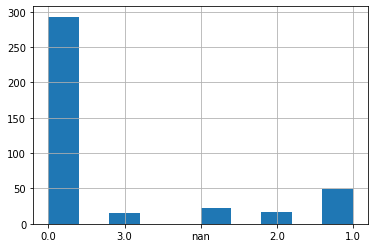

In [65]:
stud.failures.hist()
stud.failures.describe()

**famrel:** пять уникальных значения как в описании. Одно значение "-1.0", отсутствующее в описании признака заменено на "1.0". 27 строк (6,84%) в которых значения неизвестны. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много. Оценка из области психологии, в некоторых случаях могла быть дана субъективно и заполнять по частоте этот признак думаю будет не корректно. 

 ### freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [66]:
pd.DataFrame(stud.freetime.value_counts())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


In [67]:
# Посмотрим на пропуски
freetime_null = stud[stud.freetime.isnull()]
freetime_null

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
280,GP,M,17,U,NaN,A,4.0,nan,services,other,home,mother,2.0,1.0,nan,no,no,yes,yes,yes,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
290,GP,M,18,U,GT3,T,4.0,nan,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,nan,NaN,2.0,5.0,11.0,55.0
291,GP,F,17,U,GT3,T,4.0,3.0,NaN,services,reputation,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,NaN,2.0,3.0,0.0,75.0
311,GP,F,19,U,GT3,T,2.0,1.0,at_home,other,other,other,3.0,2.0,0.0,no,yes,no,no,yes,no,yes,yes,3.0,NaN,1.0,2.0,20.0,65.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,nan,2.0,no,no,no,no,no,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


Можно порассуждать про свободное время после школы анализируя: возраст age (работа), проведение времени с друзьями goout, дополнительные платные занятия по математике paid, дополнительная образовательная поддержка schoolsup, время в пути до школы traveltime, дополнительные внеучебные занятия activities. 

In [68]:
# меняем тип переменной на 'object'
stud['freetime'] = stud['freetime'].astype('str')

count     395
unique      6
top       3.0
freq      153
Name: freetime, dtype: object

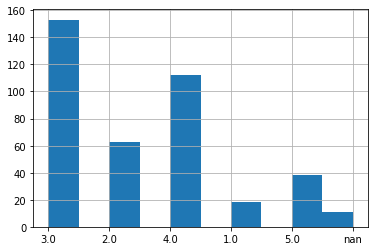

In [69]:
stud.freetime.hist()
stud.freetime.describe()

**freetime:** пять уникальных значения как в описании. 11 строк в которых значения неизвестны. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много. 

### goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [70]:
pd.DataFrame(stud.goout.value_counts())

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


In [71]:
stud_goout = stud[stud.goout.isnull()]
stud_goout

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0
92,GP,F,16,NaN,LE3,T,nan,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
200,GP,F,16,U,GT3,T,4.0,3.0,health,other,home,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,4.0,3.0,NaN,2.0,2.0,80.0
202,GP,F,17,U,NaN,T,1.0,1.0,other,other,course,mother,1.0,2.0,0.0,no,yes,yes,no,no,yes,no,no,4.0,4.0,NaN,1.0,4.0,50.0
221,GP,F,17,U,NaN,T,1.0,1.0,at_home,other,reputation,mother,1.0,3.0,1.0,no,yes,no,yes,yes,yes,no,yes,4.0,3.0,NaN,5.0,0.0,0.0
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
322,GP,F,17,R,LE3,T,2.0,2.0,services,services,course,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,no,3.0,3.0,NaN,3.0,3.0,55.0


In [72]:
# меняем тип переменной на 'object'
stud['goout'] = stud['goout'].astype('str')

count     395
unique      6
top       3.0
freq      127
Name: goout, dtype: object

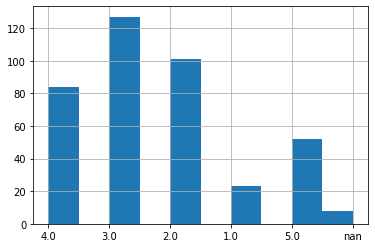

In [73]:
stud.goout.hist()
stud.goout.describe()

**goout:** пять уникальных значения как в описании. 8 строк в которых значения неизвестны. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много, выделить какое-то одно значение из пяти однозначно доминирующее невозможно.

### health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [74]:
pd.DataFrame(stud.health.value_counts())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


In [75]:
# меняем тип переменной на 'object'
stud['health'] = stud['health'].astype('str')

count     395
unique      6
top       5.0
freq      138
Name: health, dtype: object

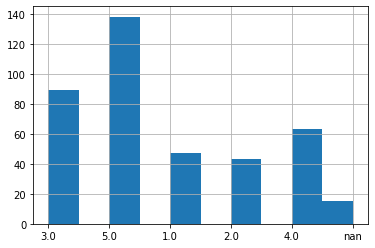

In [76]:
stud.health.hist()
stud.health.describe()

**health:** пять уникальных значения как в описании. 15 строк в которых значения неизвестны. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много, потому что выделить какое-то одно значение из пяти однозначно доминирующее невозможно.

## Расмотрим теперь категориальные столбцы, у которых в описании 2 признака: 

- **sex** — пол ученика ('F' - женский, 'M' - мужской)
- **address** — тип адреса ученика ('U' - городской, 'R' - за городом)
- **famsize** — размер семьи('LE3' <= 3, 'GT3' >3)
- **pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
- **schoolsup** — дополнительная образовательная поддержка (yes или no)
- **famsup** — семейная образовательная поддержка (yes или no)
- **paid** — дополнительные платные занятия по математике (yes или no)
- **activities** — дополнительные внеучебные занятия (yes или no)
- **nursery** — посещал детский сад (yes или no)
- **higher** — хочет получить высшее образование (yes или no)
- **internet** — наличие интернета дома (yes или no)
- **romantic** — в романтических отношениях (yes или no)

Во всех столбцах по 2 уникальных значения как в описании.

По колонке **address** можно предположить, что зная школу, в которой учится ученик и зная его время в пути до школы, сможем сделать вывод живет ли он в городе или за городом. Посмотрим среднее время, которое ученики затрачивают, чтобы добираться до школы, из разных локаций

In [77]:
pd.DataFrame(stud.address.value_counts())

,address
U,295
R,83


count     378
unique      2
top         U
freq      295
Name: address, dtype: object

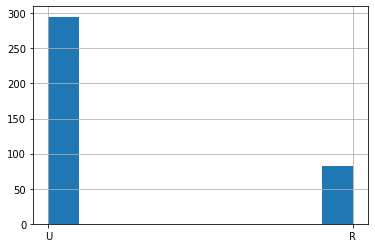

In [78]:
stud.address.hist()
stud.address.describe()

In [79]:
stud.groupby(['address', 'school']).traveltime.mean()

address  school
R        GP        1.700000
         MS        2.173913
U        GP        1.299639
         MS        1.500000
Name: traveltime, dtype: float64

**address** признак категориальный. Мы видим из нашего распределения, большая часть учеников живут в городе. Из города до школ добираться быстрее, что и подтвердил анализ среднего значения времени в дороге. Поэтому заменим пропуски на R, если traveltime > 1, а если traveltime = 1, то на U. Если данные в столбце traveltime отсутсвуют - заменим пропуск на U, как на самое часто встречающееся значение.

In [80]:
stud['address'] = stud.apply(lambda x: ('R' if x.traveltime > 1 else 'U')
                             if pd.isna(x.address) else x.address, axis=1)

По остальным колонкам заполнить пропуски для всех критериев на данный момент не представляется возможным. Больше всего пропусков в колонке pstatus (статус совместного жилья родителей)  - 45. 

count     350
unique      2
top         T
freq      314
Name: pstatus, dtype: object

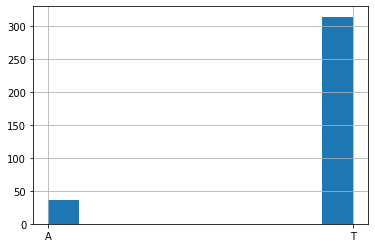

In [81]:
# посмотрим статистику
stud.pstatus.hist()
stud.pstatus.describe()

In [84]:
# какие семейные отношения, где родители проживают раздельно
stud_A = stud.loc[stud['pstatus'] == 'A']
pd.DataFrame(stud_A.famrel.value_counts())

,famrel
4.0,12
5.0,11
3.0,5
nan,4
2.0,3
1.0,1


Ничем не отличаются. Если заполнить по наиболее частому значению, то доля родителей проживающих раздельно станет еще меньше. 

In [85]:
# меняем тип переменной на 'object'
stud['traveltime'] = stud['traveltime'].astype('str')

## Числовые переменные

### age — возраст ученика (от 15 до 22)

In [86]:
pd.DataFrame(stud.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [87]:
stud.age.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

(array([186.,  98., 106.,   3.,   2.]),
 array([15. , 16.4, 17.8, 19.2, 20.6, 22. ]),
 <a list of 5 Patch objects>)

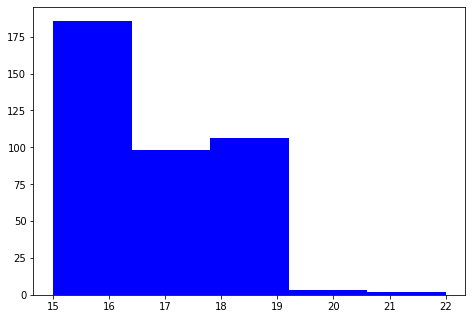

In [88]:
#  гистограмма распределения признака
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(stud['age'], bins = 5, color = 'blue')

**age:** в соответствии с описанием возраст учеников от 15 до 22. Основная масса учеников в возрасте от 15 до 18 лет. Пропусков нет.

### absences — количество пропущенных занятий

In [89]:
pd.DataFrame(stud.absences.value_counts().sort_values(ascending=False))

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


In [90]:
stud.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

У 111 человек нет пропущенных занятий. У большинства мало пропусков, менее 57. Выбиваются 2 человека с большим количеством пропущенных занятий 212 и 385. Посмотрим на них.

In [91]:
stud_absences = stud.query('absences >= 200')
stud_absences

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


212 пропусков. Имеет **45** баллов по математике, 20 лет, юноша, хорошего здоровья (4 из 5), без дополнительной образовательной поддержки, с семейной образовательной поддержкой, с дополнительными платными занятиями по математике, живет недалеко от школы, много проводит времени с друзьями. Родители живут отдельно, семья не больше 3 человек, отношения прекрасные. Тут в силу возраста и неполной семьи юноша может работать и поэтому пропускать занятия.

385 пропусков. Имеет **85** баллов по математике, 16 лет, девушка, среднего здоровья (3 из 5), с дополнительной образовательной поддержкой, без дополнительных платных занятий по математике, живет недалеко от школы, без внеучебных неудач, очень мало проводит время с друзьями, нет романтических отношений. Свободное время после школы есть. (3 из 5)  Семейные отношения ниже среднего (2 из 5), состав семьи больше 3. Родители живут вместе и оба работают. Веских причин для столь больших пропусков не вижу. Число "385" похоже на "85" двумя последними цифрами и значения (столбцы) располагаются рядом, возможно была ошибка при внесении данных. Например, могло бы быть так: 3 пропуска и 85 баллов.

In [92]:
# 385 пропусков и 85 баллов по математике это не типичный случай - удаляем значение 385
stud.loc[stud['absences'] == 385, 'absences'] = np.nan

In [93]:
# В 12 строках неизвестны значения о количестве пропущенных значениях, посмотрим на них:
temp = stud[stud.absences.isnull()]
temp

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,nan,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
172,GP,M,17,U,NaN,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
215,GP,F,17,U,LE3,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,no,NaN,no,yes,yes,NaN,no,4.0,4.0,4.0,1.0,NaN,75.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,NaN,85.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,nan,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
254,GP,M,17,U,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0


Количество пропущенных занятий может быть следствием значений health, famrel, freetime, goout, traveltime, activities и т.д

- health — текущее состояние здоровья, если ребенок много болеет, то он пропускает занятия
- famrel — семейные отношения, если у него плохие отношения в семье, то он не хочет идти домой делать уроки и заниматься
- freetime — свободное время после школы, если мало времени после учебы, то он не делает домашнее задание и не идет на занятия
- goout — проведение времени с друзьями, если ребенок много времени проводит с друзьями, то не хочет идти на занятия
- traveltime - далеко живет от школы
- activities - дополнительные внеучебные занятия 

Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения много.

**absences:** у одного школьника 212 пропусков, у остальных менее 57. Значение 385 в соответствии со здравым смыслом признано нетипичным и заменено на NaN.  

### score — баллы по госэкзамену по математике

In [94]:
pd.DataFrame(stud.score.value_counts().sort_values(ascending=False))

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


In [95]:
# строк с неизвестными значениями
stud.score.isnull().sum()

6

**Score** - это целевая переменная. В связи с этим, я считаю правильным удалить 6 строк с пропусками в столбце целевой переменной.

In [96]:
# удалим пропуски
stud.dropna(subset=['score'], inplace=True)

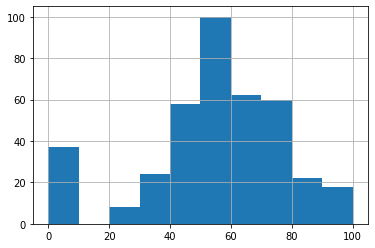

In [97]:
stud.score.hist()

В датасете у 37 человек (9.37%) стоит 0 баллов за госэкзамен по математике. Следующий балл 20 у одного человека, и затем 25 баллов у 7 человек, 30 у 15 человек. Вероятно, 0 баллов учащийся мог в получить в разных случаях: 1) решая, но не дотянув до минимального порога в 20 баллов; 2) нарушив правила на экзамене; 3) отсутствовал на экзамене. 

In [98]:
# Выставим условные оценки по баллам
def mark_ord(m):
    if m < 20:              # Слабо
        return 2
    if m >= 20 and m < 40:  # Удовлетворительно
        return 3
    if m >= 40 and m < 80:   # Превосходно
        return 4
    if m >= 80:              # Выше Ожидаемого
        return 5


# добавим столбец с условной оценкой 2-5
stud['mark'] = stud.score.apply(mark_ord)

In [99]:
# Посмотрим распределение оценок в процентах, так нагляднее
stud_mark = round(stud['mark'].value_counts() / len(stud)*100, 2)
print(stud_mark)

4    71.98
5    10.28
2     9.51
3     8.23
Name: mark, dtype: float64


Посмотрим на статистику ЕГЭ по математике 2015-2016 годы в РФ

- год. . . . .<27. . . .27-40. . . .41-80. . . .81-100. . . .средний балл
- 2015. . . .21,1. . . . 26,6. . . . 50,8. . . . . . 1,5. . . . . . 45,6
- 2016. . . .15,3. . . . 29,4. . . . 52,7. . . . . . 2,9. . . . . . 51,9

Значение количества учащихся с 0 баллов в 9,37% уже и не кажется таким большим. А 10,13% высокобальников вообще прекрасный результат! Поэтому считаю, что строки с 0 баллов в столбце score оставить без изменений.

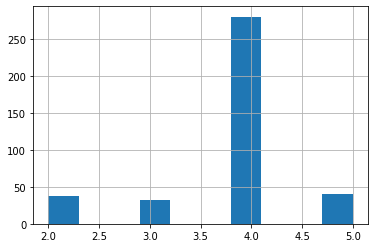

In [100]:
stud.mark.hist()

In [101]:
stud.describe()

,age,absences,score,mark
count,389.000000,377.000000,389.000000,389.000000
mean,16.673522,6.318302,52.262211,3.830334
std,1.265662,13.371712,22.919022,0.733587
min,15.000000,0.000000,0.000000,2.000000
25%,16.000000,0.000000,40.000000,4.000000
50%,17.000000,4.000000,55.000000,4.000000
75%,18.000000,8.000000,70.000000,4.000000
max,22.000000,212.000000,100.000000,5.000000


**Score** - это целевая переменная. Удалено 6 строк с неизвестными значениями.

**Смотрим датасет, что имеем после всех изменений**

При жесткой необходимости иметь датасет без пропусков выполнить код:

In [ ]:
# можно заменить все недостающие значения медианой 
# сразу для всех числовых признаков:
#
#stud_numeric = stud.select_dtypes(include=[np.number])
#numeric_cols = stud_numeric.columns.values
#for col in numeric_cols:
#    missing = stud[col].isnull()
#    num_missing = np.sum(missing)
#    if num_missing > 0:
#        print('imputing missing values for: {}'.format(col))
#        stud['{}_ismissing'.format(col)] = missing
#        med = stud[col].median()
#        stud[col] = stud[col].fillna(med)
#
# Будем рассматривать каждый признак по отдельности, поэтому код выполнять не будем

In [ ]:
# Например, для всех категориальных признаков можно использовать в качестве
# заполнителя наиболее часто встречающееся значение
#
# stud_non_numeric = stud.select_dtypes(exclude=[np.number])
# non_numeric_cols = stud_non_numeric.columns.values
# for col in non_numeric_cols:
#     missing = stud[col].isnull()
#     num_missing = np.sum(missing)
#     if num_missing > 0:
#         print('imputing missing values for: {}'.format(col))
#         stud['{}_ismissing'.format(col)] = missing
#         top = stud[col].describe()['top']
#         stud[col] = stud[col].fillna(top)
#
# Будем рассматривать каждый признак по отдельности, поэтому код выполнять не будем

In [102]:
# смотрим форму датафрейма
stud.shape

(389, 30)

In [103]:
# смотрим информацию
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     389 non-null    object 
 4   famsize     362 non-null    object 
 5   pstatus     344 non-null    object 
 6   medu        389 non-null    object 
 7   fedu        389 non-null    object 
 8   mjob        370 non-null    object 
 9   fjob        353 non-null    object 
 10  reason      372 non-null    object 
 11  guardian    358 non-null    object 
 12  traveltime  389 non-null    object 
 13  studytime   389 non-null    object 
 14  failures    389 non-null    object 
 15  schoolsup   380 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        350 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     374 non-null    o

In [104]:
# выводим информацию о количестве пропусков
stud.isnull().sum()

school         0
sex            0
age            0
address        0
famsize       27
pstatus       45
medu           0
fedu           0
mjob          19
fjob          36
reason        17
guardian      31
traveltime     0
studytime      0
failures       0
schoolsup      9
famsup        38
paid          39
activities    14
nursery       15
higher        20
internet      34
romantic      31
famrel         0
freetime       0
goout          0
health         0
absences      12
score          0
mark           0
dtype: int64

In [105]:
# смотрим статистики для количественных переменных
# для каждой колонки выводится количество среднее, стандартное
# отклонение, минимум, максимум, процентиль
stud.describe()

,age,absences,score,mark
count,389.000000,377.000000,389.000000,389.000000
mean,16.673522,6.318302,52.262211,3.830334
std,1.265662,13.371712,22.919022,0.733587
min,15.000000,0.000000,0.000000,2.000000
25%,16.000000,0.000000,40.000000,4.000000
50%,17.000000,4.000000,55.000000,4.000000
75%,18.000000,8.000000,70.000000,4.000000
max,22.000000,212.000000,100.000000,5.000000


In [106]:
# Для каждой колонки с типом object
# выводим количество непустых строк, уникальных значений,
# самое частое значение (top) и частоту этого значения (freq),
# создается список категориальных переменных
categorical_columns = [c for c in stud.loc[:,
                                           stud.columns] if stud[c].dtype.name == 'object']
stud[categorical_columns].describe()

,school,sex,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health
count,389,389,389,362,344,389,389,370,353,372,358,389,389,389,380,351,350,375,374,369,355,358,389,389,389,389
unique,2,2,2,2,2,6,6,5,5,4,3,4,5,5,2,2,2,2,2,2,2,2,6,6,6,6
top,GP,F,U,GT3,T,4.0,2.0,other,other,course,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,3.0,5.0
freq,344,204,301,255,308,131,105,127,194,135,248,260,189,290,331,216,197,192,297,350,300,235,178,152,126,137


# 3. Корреляционный анализ

они коррелируют с оценкой за госэкзамен по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

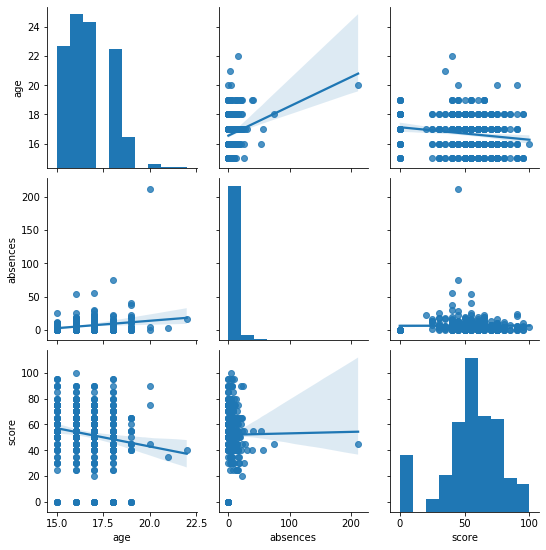

In [107]:
stud_num1 = stud[['age', 'absences', 'score']]
sns.pairplot(stud_num1, kind='reg')

In [108]:
# Используем для наглядности матрицу корреляций:
stud_num1.corr()

,age,absences,score
age,1.000000,0.210715,-0.155726
absences,0.210715,1.000000,0.006735
score,-0.155726,0.006735,1.000000


**Вывод:** оставляем эти два признака возраст (age) и количество пропущенных занятий (absences), они не сколлерированны между собой. Можно заметить, что между возрастом и баллами есть обратная корреляция. Чем выше возраст, тем ниже score

##  4. Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Ппеременные, которые нужно рассмотреть:
- Бинарных (два значения) - 13: school, sex, address, famsize, pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic 
- Оценочных (несколько значений) - 13: medu, fedu, mjob, fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health

In [109]:
# для удобства составим списки этих критериев
# бинарный мы уже сделали выше list_of_binary_columns но нужно добавить к нему school
list_of_binary_columns = ('school', 'sex', 'address', 'famsize', 'pstatus', 'schoolsup',
                          'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic')
list_of_rating_columns = ('medu', 'fedu', 'mjob', 'fjob',
                          'reason', 'guardian', 'traveltime', 'studytime',
                          'failures', 'famrel', 'freetime', 'goout', 'health')
list_of_all_columns = []
list_of_all_columns.extend(list_of_binary_columns)
list_of_all_columns.extend(list_of_rating_columns)

### Анализ "бинарных" категориальных переменных

In [110]:
# функция для бинарных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 3))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

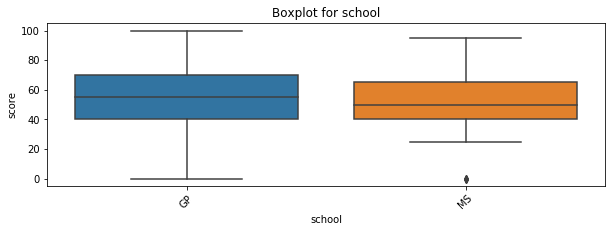

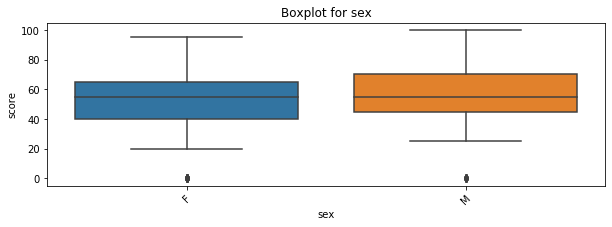

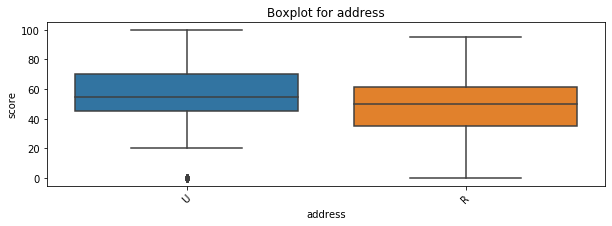

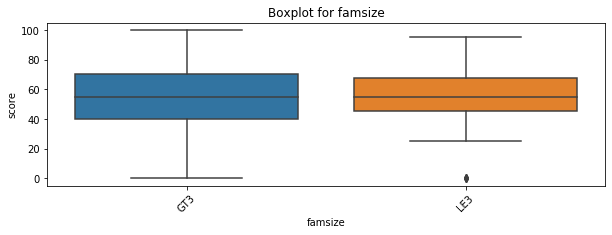

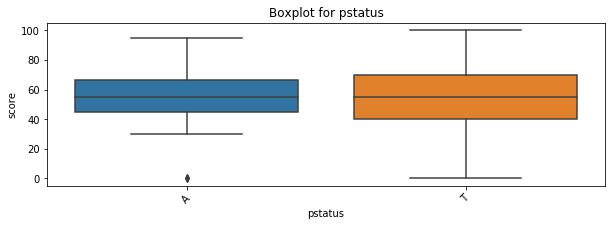

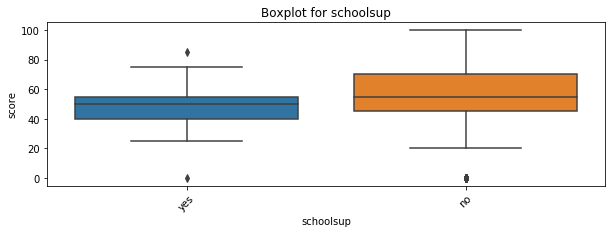

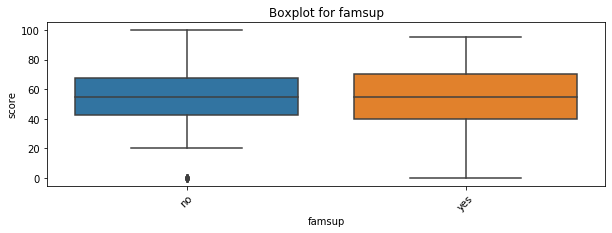

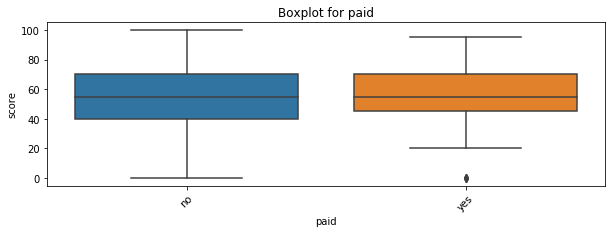

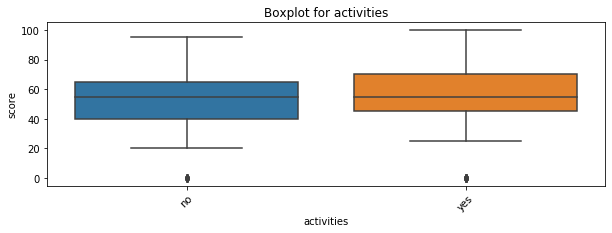

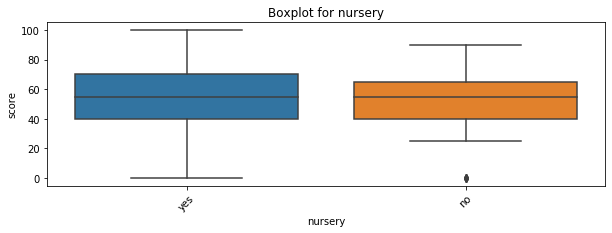

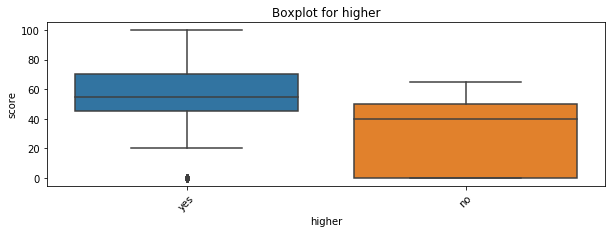

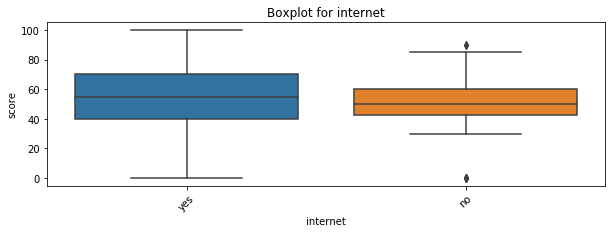

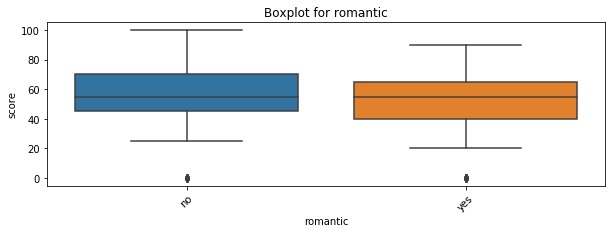

In [111]:
# сначала сделаем box plot на бинарных
for col in list_of_binary_columns:
    get_boxplot(col)

Визуально кажется что плотности распределения существенно различаются для следующих распределений:

school, sex, address, schoolsup,  higher, internet, но посмотрим, что покажет теста Стьюдента

### Анализ "оценочных" категориальных переменных

In [112]:
# функция для оценочных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

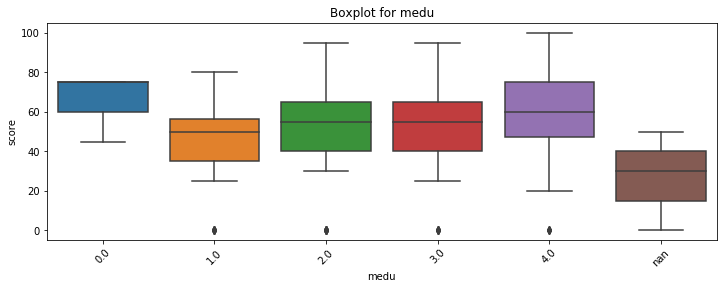

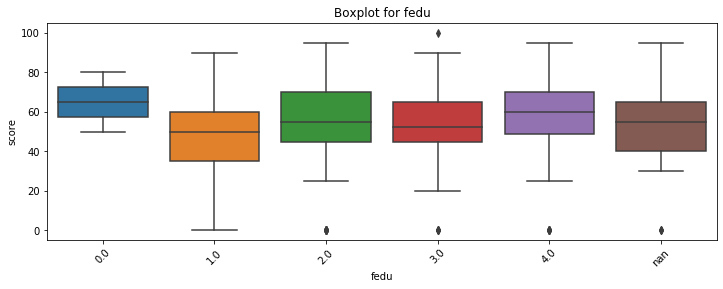

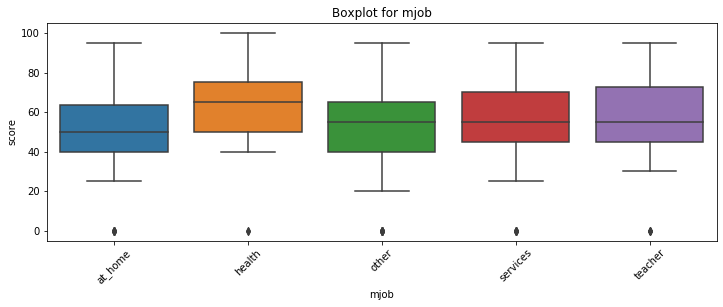

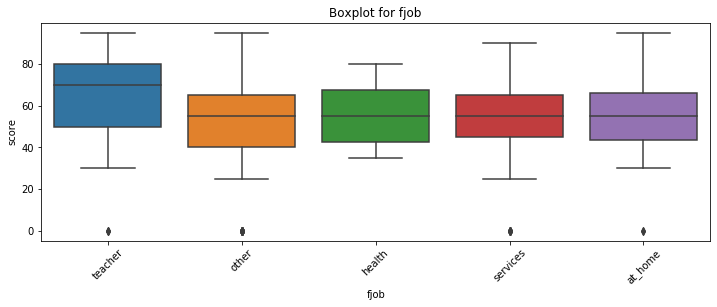

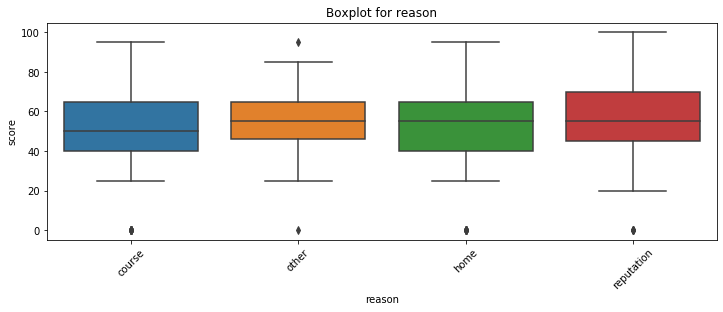

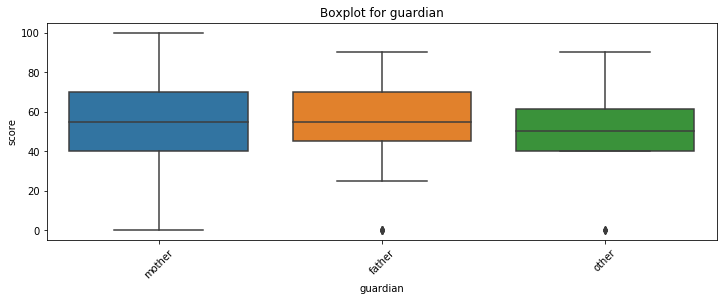

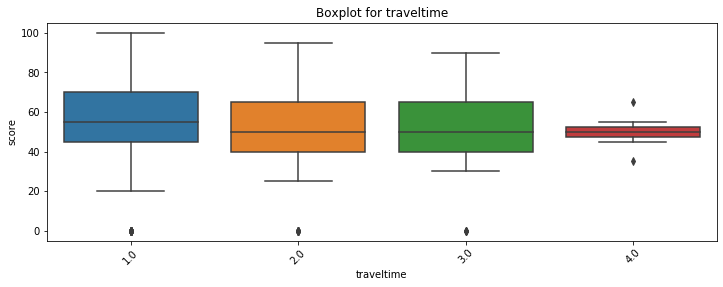

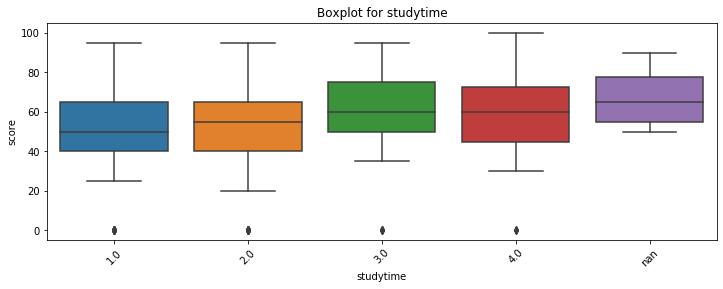

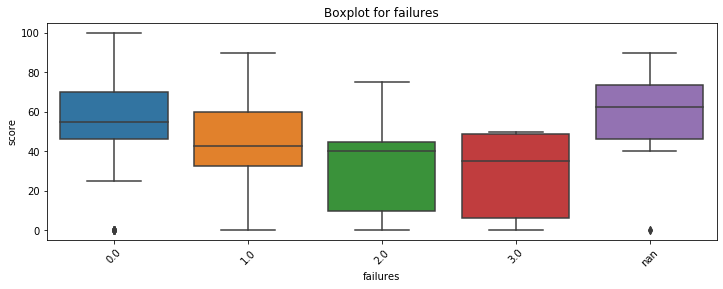

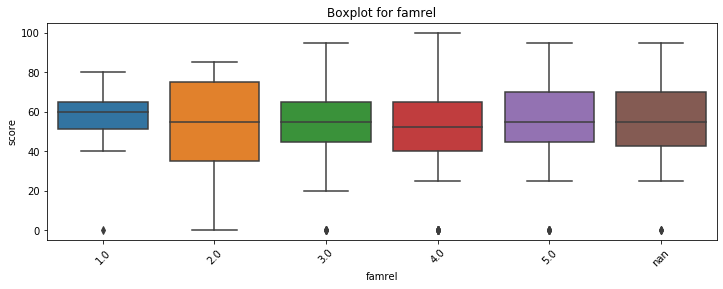

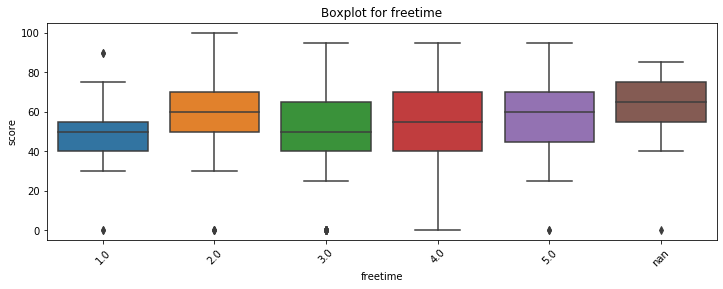

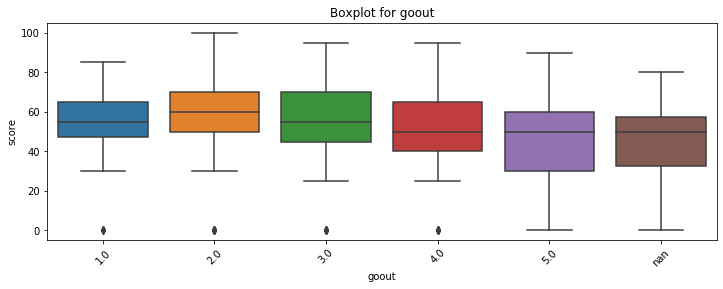

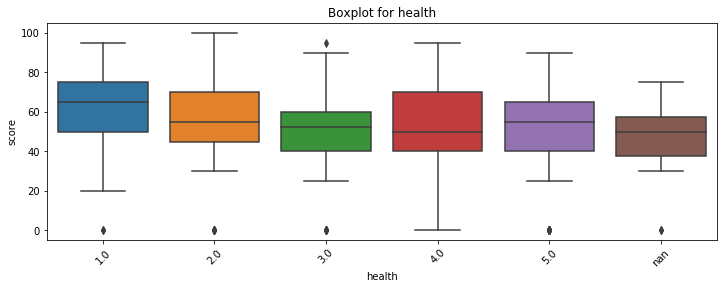

In [113]:
# сначала сделаем box plot на бинарных
for col in list_of_rating_columns:
    get_boxplot(col)

По графикам похоже, что параметры medu, fedu, mjob, fjob, guardian, failures, могут влиять на итоговую оценку на экзамене. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика.

Тест Стьюдента по всем категориальным признакам для переменной **score**

In [114]:
# Проверим, есть ли статистическая разница в распределении оценок по всем категориальным признакам,
# с помощью теста Стьюдента. Проверим нулевую гипотезу о том,
# что распределения score по различным параметрам неразличимы:


def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'].dropna(),
                          stud.loc[stud.loc[:, column] == comb[1], 'score'].dropna()).pvalue
        if ttest <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('!!!Найдены статистически значимые различия для колонки',
                  column, round(ttest, 4))
            break

In [115]:
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для колонки higher 0.0003
!!!Найдены статистически значимые различия для колонки romantic 0.0074
!!!Найдены статистически значимые различия для колонки medu 0.0017
!!!Найдены статистически значимые различия для колонки mjob 0.0042
!!!Найдены статистически значимые различия для колонки failures 0.0


Дополнительно проверим с помощью теста Стьюдента по всем категориальным признакам дополнительно введенную для анализа переменную **mark** (каждая строка отнесена в группу по score в диапазонах 0-19, 20-40, 41-79, 80-100). 

In [116]:
# Проверим, есть ли статистическая разница в распределении оценок по всем категориальным признакам,
# с помощью теста Стьюдента. Проверим нулевую гипотезу о том,
# что распределения mark по различным параметрам неразличимы:


def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'mark'].dropna(),
                          stud.loc[stud.loc[:, column] == comb[1], 'mark'].dropna()).pvalue
        if ttest <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('!!!Найдены статистически значимые различия для колонки',
                  column, round(ttest, 4))
            break

In [117]:
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для колонки sex 0.0463
!!!Найдены статистически значимые различия для колонки paid 0.031
!!!Найдены статистически значимые различия для колонки higher 0.002
!!!Найдены статистически значимые различия для колонки romantic 0.0069
!!!Найдены статистически значимые различия для колонки medu 0.0006
!!!Найдены статистически значимые различия для колонки failures 0.0001


**Вывод:** мы видим статистически значимо различаются 10 параметров: 
- sex — пол ученика 
- address — тип адреса ученика 
- paid - дополнительные платные занятия по математике 
- higher — хочет получить высшее образование
- romantic — в романтических отношениях
- medu — образование матери
- mjob — работа матери
- failures — количество внеучебных неудач
- age - возраст ученика 
- absences — количество пропущенных занятий

Оставим эти переменные в датасете для дальнейшего построения модели. 

# 5. Формирование датасета для модели

In [118]:
stud_for_model = stud.loc[:, ['sex', 'age', 'address', 'medu', 'mjob', 'failures',
                              'paid', 'higher', 'romantic', 'absences', 'score']]

In [119]:
# смотрим форму датафрейма
stud_for_model.shape

(389, 11)

In [120]:
# смотрим информацию
stud_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       389 non-null    object 
 1   age       389 non-null    int64  
 2   address   389 non-null    object 
 3   medu      389 non-null    object 
 4   mjob      370 non-null    object 
 5   failures  389 non-null    object 
 6   paid      350 non-null    object 
 7   higher    369 non-null    object 
 8   romantic  358 non-null    object 
 9   absences  377 non-null    float64
 10  score     389 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 46.5+ KB


В итоговом датасете stud_for_model для модели
- 11 столбцов 
- 389 строк

# 6. Выводы

В результате EDA  датасета для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

В датасет 395 строк и 30 столбцов. 

Столбец studytime, granular удален, так как он на 100% обратно скоррелирован с признаком studytime.
В столбце score удалено 6 строк с неизвестными значениями.

В данных много пустых значений. Только 97 строк (24,56%) полностью заполнены и не содержат пропусков. 3 столбца из 29 заполнены полностью (school, sex, age). Больше всех пропусков в столбцах: pstatus 11.39%, paid 10.13%, famsup 9.87%, fjob 9.11%.
пропуски заполнены в столбцах:
- fedu - заполнены 3 (из 24) значением "4" - высшее образование в записях с работой отца "учитель".
- traveltime - 28 строк,  в которых значения неизвестны заполнены исходя из средних значений по адресу.
- address - заполнен по времени в пути до школы
При необходимости 100% заполнения пропусков есть закомментированный код реализующий заполнение по частоте и медиане.

Выбросы найдены и объяснены "человеческим фактором", что позволяет сделать вывод о том, что данные достаточно чистые.
- fedu - одно значение "40.0", отсутствующее в описании датасета заменено на на "4.0"
- famrel - одно значение "-1.0", отсутствующее в описании признака заменено на "1.0".
- absences - значение 385 в соответствии со здравым смыслом признано нетипичным и заменено на NaN.

**гипотезы:**
- sex — юношам математика дается лучше; 
- address — у городских учеников баллы выше;
- paid - у занимающихся на дополнительных платных занятиях по математике успехи стабильнее;  
- higher — у тех, кто хочет получить высшее образование выше баллы;
- romantic — у тех, кто в романтических отношениях быллы ниже; 
- medu — отсутствие образования матери или высшее образование влияет на успехи в математике;
- mjob — у учащихся, матери которых работают в определенных отраслях баллы выше в сдаче экзамена;
- failures — отсутствие внеучебных неудач положительно влияет на успехи; 
- age - чем выше возраст ученика, тем ниже score; 
- absences — количество пропущенных занятий отрицательно влияет на успехи в сдаче экзамена.


Самые **важных критерии**, которые предлагаются использовать в дальнейшем для построения модели это:
- sex — пол ученика 
- address — тип адреса ученика 
- paid - дополнительные платные занятия по математике 
- higher — хочет получить высшее образование
- romantic — в романтических отношениях
- medu — образование матери
- mjob — работа матери
- failures — количество внеучебных неудач
- age - возраст ученика  
- absences — количество пропущенных занятий

Результат работы включает подготовленный датасет stud_for_model 